In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

1.	You need to perform data analysis on the raw data and present with at least one data visualization.  
•	What insights can you derive from the raw data? 
•	Why is the project worthwhile? 
•	What are the potential challenges you may be facing during the model development process?


To perform data analysis on the raw data, I would start by reviewing the structure and content of the dataset, including the number of rows and columns, the data types, and any missing values. I would then use visualizations such as histograms, scatter plots, and heatmaps to explore the relationships between the variables and identify any patterns or anomalies in the data. From this analysis, I may be able to derive insights such as the distribution of transactions by amount and time, or the correlation between different variables and the target variable (fraud or not fraud). I would also evaluate the balance of the target variable to assess whether there is a class imbalance that may need to be addressed during model development.
The project is worthwhile because detecting frauds can save the company significant amounts of money, as well as help to protect its customers and reputation.
Potential challenges may include dealing with imbalanced data, dealing with highly correlated features, and dealing with high dimensionality.

In [34]:
data_raw = pd.read_csv("sample_transaction_data.csv")

In [35]:
data_raw.head()

,transaction_id,targets,transaction_date,account_open_date,transaction_amount,beneficiary,col_0,col_1,col_2,col_3,...,col_106,col_107,col_108,col_109,col_110,col_111,col_112,col_113,col_114,col_115
0,TRX00000000,1,2021-10-03,2021-06-28,52092.586207,Manny's Auto Parts,0.0,False,25.0,0,...,0,1,False,0,0,True,0.0,0.0,0,0.0
1,TRX00000001,0,2021-10-03,2021-05-16,50042.970326,Zach's Agriculture,0.0,False,25.0,0,...,0,1,False,0,0,False,NaN,0.0,0,0.0
2,TRX00000002,0,2021-10-03,2021-04-19,54255.114574,Fiona's Technical Services,0.0,False,25.0,0,...,0,1,False,0,0,False,NaN,0.0,0,NaN
3,TRX00000003,0,2021-10-03,2021-04-13,61722.527737,Omar's Exteriors,0.0,True,25.0,0,...,0,1,False,0,0,False,1.0,0.0,0,NaN
4,TRX00000004,0,2021-10-03,2021-03-15,54313.312765,Steve's Utilities,0.0,True,25.0,0,...,98,1,False,14,0,False,NaN,0.0,0,29.0


In [36]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15781 entries, 0 to 15780
Columns: 122 entries, transaction_id to col_115
dtypes: bool(33), float64(26), int64(54), object(9)
memory usage: 11.2+ MB


In [37]:
data_raw.describe()

,targets,transaction_amount,col_0,col_3,col_4,col_8,col_9,col_10,col_13,col_14,...,col_104,col_105,col_106,col_107,col_109,col_110,col_112,col_113,col_114,col_115
count,15781.000000,1.578100e+04,12186.000000,15781.000000,15781.000000,15781.000000,10898.000000,15781.000000,15781.0,9740.000000,...,5485.000000,15781.000000,15781.000000,15781.000000,15781.000000,15781.000000,2150.000000,10438.0,15781.000000,11437.000000
mean,0.047589,1.101420e+05,0.004185,0.266967,2.487358,0.669413,17.052028,334.344718,0.0,0.027002,...,0.015314,0.377733,9.180153,0.999937,9.205120,1.112287,0.006512,0.0,0.010392,7.206610
std,0.212901,3.396154e+05,0.064560,1.858497,47.191492,20.223097,180.610973,728.378619,0.0,0.162098,...,0.122812,4.114176,112.744071,0.007960,75.953666,5.382758,0.080450,0.0,0.833864,24.631301
min,0.000000,5.000317e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,5.213120e+04,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,5.812264e+04,0.000000,0.000000,0.000000,0.000000,0.000000,123.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,8.108830e+04,0.000000,0.000000,0.000000,0.000000,7.000000,334.000000,0.0,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,5.000000
max,1.000000,2.089189e+07,1.000000,117.000000,5054.000000,2441.000000,13567.000000,25927.000000,0.0,1.000000,...,1.000000,297.000000,9789.000000,1.000000,4924.000000,202.000000,1.000000,0.0,102.000000,973.000000


In [38]:
data_raw.select_dtypes('object')

,transaction_id,transaction_date,account_open_date,beneficiary,col_2,col_7,col_15,col_30,col_40
0,TRX00000000,2021-10-03,2021-06-28,Manny's Auto Parts,25.0,E,BL1,US,Product_6
1,TRX00000001,2021-10-03,2021-05-16,Zach's Agriculture,25.0,B,BL0,US,Product_1
2,TRX00000002,2021-10-03,2021-04-19,Fiona's Technical Services,25.0,A,BL0,US,Product_0
3,TRX00000003,2021-10-03,2021-04-13,Omar's Exteriors,25.0,C,BL0,US,Product_9
4,TRX00000004,2021-10-03,2021-03-15,Steve's Utilities,25.0,C,BL1,GB,Product_0
...,...,...,...,...,...,...,...,...,...
15776,TRX00015776,2021-12-31,2021-08-28,Laura's Utilities,17.22,A,BL0,US,Product_8
15777,TRX00015777,2021-12-31,2021-08-07,Kathy's Food Processing,17.22,B,BL1,US,Product_0
15778,TRX00015778,2021-12-31,2021-07-19,Xavier's Technical Services,17.22,C,BL0,US,Product_8
15779,TRX00015779,2021-12-31,2021-07-01,David's Tutoring,17.22,A,BL1,US,Product_0


In [39]:
cols = np.array(data_raw.columns, dtype='str')

In [40]:
## Some of the columns have no useful information (having same values)
## So dropping them from the data
drop_cols = ['col_101', 'col_103', 'col_113', 'col_13', 'col_21', 'col_23', 'col_25',
             'col_26', 'col_27', 'col_29', 'col_33', 'col_43', 'col_44', 'col_45',
             'col_47', 'col_50', 'col_62', 'col_70', 'col_72', 'col_75', 'col_81',
             'col_87', 'col_92', 'col_94']
data_raw.drop(drop_cols, axis=1, inplace=True)

## Preprocessing

## transaction_id

In [41]:
# transaction_id won't help in anyway for a machine_learning model 
# as its a unique string for each row with no correlation to any of the data.
# Hence, dropping it 
data = data_raw.drop('transaction_id', axis=1).copy(deep=True)

## targets

In [42]:
data = data[data.targets.notnull()].copy(deep=True)

## transaction_date

In [43]:
data = data[data.transaction_date.notnull()]

In [44]:
data['transaction_day'] = pd.to_datetime(data.transaction_date).dt.day
data['transaction_month'] = pd.to_datetime(data.transaction_date).dt.month
data['transaction_year'] = pd.to_datetime(data.transaction_date).dt.year

## account_open_date

In [45]:
len(data[data.account_open_date.isnull()])

106

In [46]:
# Only 106 columns missing so we can drop those
data = data[data.account_open_date.notnull()]
data['account_open_day'] = pd.to_datetime(data.account_open_date).dt.day
data['account_open_date'] = pd.to_datetime(data.account_open_date).dt.month
data['account_open_date_year'] = pd.to_datetime(data.account_open_date).dt.year

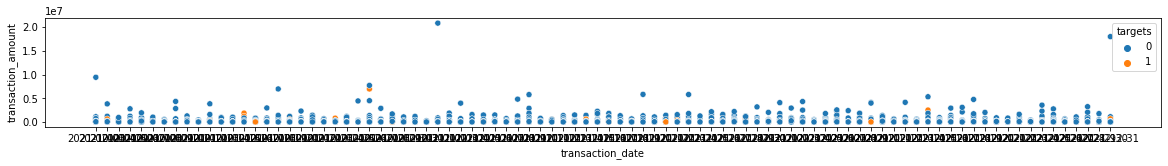

In [47]:
plt.figure(figsize=(20,2))
sns.scatterplot(x='transaction_date', y='transaction_amount', hue='targets', data=data)

3.	Derive at least one new features from the data.  
•	Why can these features potentially help your model?

To derive new features from the data, I would consider using feature engineering techniques such as creating interaction terms, binning variables, and combining categorical variables. For example, if the dataset includes information on the type of transaction, the location of the transaction, and the time of the transaction, I could create a new feature that combines these variables to indicate whether the transaction is of a certain type in a certain location at a certain time. This feature could potentially help the model by providing additional information about the context of the transaction.

In [48]:
# Create a new feature that represents the time between account open date and transaction date
data['account_age'] = (pd.to_datetime(data['transaction_date']) - pd.to_datetime(data['account_open_date'])).dt.days
data.drop(['transaction_date','account_open_date'],axis=1,inplace=True)

## benificiary

In [49]:
data = data[data.beneficiary.notnull()]

In [50]:
len(data.beneficiary.unique())

1531

In [51]:
# We need to encode thos 1531 beneficiaries
le_beneficiary = LabelEncoder()

In [52]:
data['beneficiary'] = le_beneficiary.fit_transform(data.beneficiary.values)

## col_2

In [53]:
data = data[data.col_2.notnull()]

In [54]:
data.col_2.unique()

array([25.0, 22.96, 21.3, 21.0, 19.54, 18.77, 20.0, 19.85, 18.64, 16.86,
       16.3, 16.31, 15.7, 15.49, 15.01, 15.43, 15.24, 15.98, 16.98, 16.53,
       16.26, 16.41, 16.03, 15.1, 15.44, 16.48, 17.22, 17.78, 18.73,
       17.66, 16.29, 16.49, 16.37, 17.11, 17.59, '17.59', '17.91', '25',
       '19.17', '19.38', '18.58', '.', '28.62', '22.96', '27.19', '31.12',
       '27.95', '30.67', '27.18', '21.89', '19.9', '21.58', '18.69',
       '20.31', '19.29', '20.57', '21.57', '22.87', '21.01', '18.63',
       '17.96', '17.68', '17.54', '16.95', '17.33', '17.22'], dtype=object)

In [55]:
# removing invalid values
data = data[data.col_2 != '.']

In [56]:
data['col_2'] = data['col_2'].astype(float)

## col_7, col_15, col_30, col_40

In [57]:
data = data[data.col_7.notnull()]
data = data[data.col_15.notnull()]
data = data[data.col_30.notnull()]
data = data[data.col_40.notnull()]

In [58]:
le_col7 = LabelEncoder()
data['col_7'] = le_col7.fit_transform(data.col_7.values)
le_col15 = LabelEncoder()
data['col_15'] = le_col7.fit_transform(data.col_15.values)
le_col30 = LabelEncoder()
data['col_30'] = le_col7.fit_transform(data.col_30.values)
le_col40 = LabelEncoder()
data['col_40'] = le_col7.fit_transform(data.col_40.values)

In [59]:
# Dropping columns with more than 20% null values
for col in data.columns:
  null_pct = len(data[data[col].isnull()])/len(data)
  if(null_pct > 0.2):
    print(f"{col} {len(data[data[col].isnull()])/len(data)}")
    data.drop(col, axis=1, inplace=True)

# Filling the rest of the missing data
data.fillna(method='bfill', axis=0, inplace=True)

col_0 0.22806102490546357
col_9 0.309688355717825
col_14 0.38316599295866477
col_17 0.715086712739601
col_22 0.320185161037945
col_39 0.7747424696831399
col_68 0.47822401877689397
col_73 0.28902073282044594
col_80 0.7876515843004303
col_89 0.28373973138609987
col_104 0.6524970661103142
col_112 0.8632807406441518
col_115 0.2755900378145782


## Data Analysis

In [60]:
data.describe()

,targets,transaction_amount,beneficiary,col_2,col_3,col_4,col_7,col_8,col_10,col_15,...,col_107,col_109,col_110,col_114,transaction_day,transaction_month,transaction_year,account_open_day,account_open_date_year,account_age
count,15338.000000,1.533800e+04,15338.000000,15338.000000,15338.000000,15338.000000,15338.000000,15338.000000,15338.000000,15338.000000,...,15338.0,15338.000000,15338.000000,15338.000000,15338.000000,15338.000000,15338.0,15338.000000,15338.0,15338.000000
mean,0.047399,1.107031e+05,772.199961,20.878399,0.268288,2.483635,1.412244,0.680076,334.508997,0.411657,...,1.0,9.312166,1.119246,0.010627,15.852914,11.015778,2021.0,15.678250,1970.0,18945.998566
std,0.212497,3.440152e+05,441.601404,4.089925,1.880172,47.537085,1.146570,20.510348,728.308116,0.492150,...,0.0,76.935202,5.434219,0.845782,8.666076,0.819108,0.0,8.758811,0.0,25.933238
min,0.000000,5.000317e+04,0.000000,15.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,1.000000,10.000000,2021.0,1.000000,1970.0,18902.000000
25%,0.000000,5.213418e+04,396.000000,17.220000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,8.000000,10.000000,2021.0,8.000000,1970.0,18924.000000
50%,0.000000,5.813687e+04,771.000000,20.000000,0.000000,0.000000,2.000000,0.000000,123.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,16.000000,11.000000,2021.0,16.000000,1970.0,18945.000000
75%,0.000000,8.109277e+04,1157.000000,25.000000,0.000000,0.000000,2.000000,0.000000,335.000000,1.000000,...,1.0,0.000000,0.000000,0.000000,23.000000,12.000000,2021.0,23.000000,1970.0,18969.000000
max,1.000000,2.089189e+07,1530.000000,31.120000,117.000000,5054.000000,4.000000,2441.000000,25927.000000,1.000000,...,1.0,4924.000000,202.000000,102.000000,31.000000,12.000000,2021.0,31.000000,1970.0,18991.000000


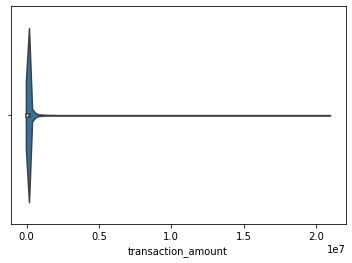

In [61]:
sns.violinplot(data['transaction_amount'])

In [62]:
c = data.corr().abs().unstack().sort_values(kind="quicksort").dropna(axis=0)
c = c[c != 1]
corr_cols = list(c['targets'].index.values)
corr_cols.append('targets')
len(corr_cols)

85

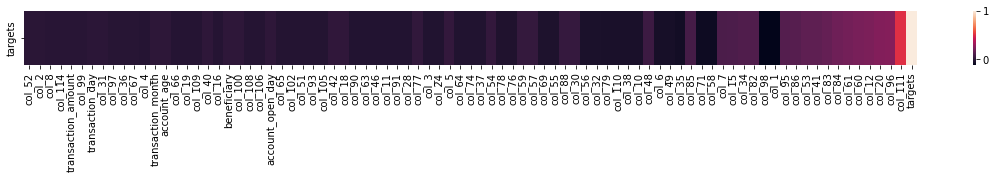

In [63]:
# Only few columns are correlated with the target
data = data[corr_cols]
plt.figure(figsize=(20,1))
sns.heatmap(data.corr()[-1:])

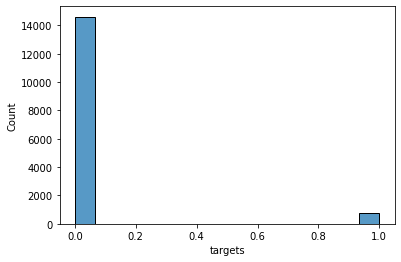

In [64]:
sns.histplot(data.targets)

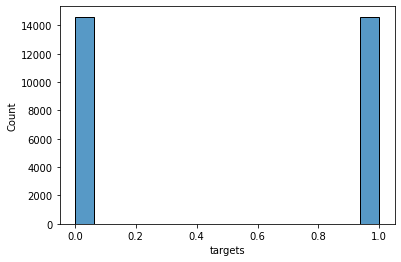

In [65]:
X = data.drop('targets', axis=1)
y = data['targets']
# Highly imbalanced data, balancing
oversampler = SMOTE(random_state=116, n_jobs=-1)
X_s, y_s = oversampler.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.33, stratify=y_s, shuffle=True, random_state=116)
sns.histplot(y_s)

# Model Training, Optimization and Evaluation

2.	Define proper performance metrics and provide business and statistical rationales of your selections.  
•	Why are these metrics appropriate? 

To define proper performance metrics, I would consider both business and statistical considerations. For example, I would use metrics such as precision, recall, and F1-score to evaluate the model's ability to accurately identify fraud while minimizing false positives. I would also use metrics such as the area under the receiver operating characteristic curve (AUC-ROC) to evaluate the model's overall performance. These metrics are appropriate because they take into account both the true positive rate and the false positive rate, which are important for balancing the costs and benefits of the fraud detection process.

In [66]:
def print_confusion_matrix(cf_matrix):
  group_names = ['True Neg','False Pos','False Neg','True Pos']
  group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  plt.figure()
  sns.heatmap(cf_matrix , annot=labels, fmt='', cmap='Blues', cbar=False)

4.	Set up an experimental framework and perform hyperparameter optimization.  
•	Does your design lead to a good approximation to the performance in production in the future?

To set up an experimental framework and perform hyperparameter optimization, I would use techniques such as cross-validation and grid search to test d hyperparameter settings. This design leads to a good approximation to the performance in production in the future because it allows me to evaluate the model's performance on unseen data and tune the model to achieve the best possible performance.

## XGBClassifier

In [67]:
param_dict = {'n_estimators':[600,800], 'max_depth':[6,8]}
gs = GridSearchCV(XGBClassifier(), param_grid=param_dict, scoring='roc_auc', cv=5, n_jobs=-1, verbose=6, refit=True)
gs.fit(X_train, y_train)
print(f"Best parameters are {gs.best_params_}")
print(f"Best score is {gs.best_score_}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters are {'max_depth': 6, 'n_estimators': 800}
Best score is 0.9993124706307128


In [68]:
roc_auc_score(y_test,gs.best_estimator_.predict_proba(X_test)[:,1])

0.9992279268890802

In [69]:
xgb = XGBClassifier(n_estimators=800,
                    max_depth=8,
                    learning_rate=0.1,
                    gamma=0,
                    reg_alpha=0,
                    reg_lambda=1,
                    n_jobs=-1)

xgb.fit(X_train, y_train)

xgb_predict_train = xgb.predict(X_train)
xgb_predict_test = xgb.predict(X_test)

print(f"-------------Accuracy score----------------")
print(f"Train score: {xgb.score(X_train, y_train)}")
print(f"Test score: {xgb.score(X_test, y_test)}")
print(f"-----------------f1_score------------------")
print(f"Train f1 score: {f1_score(y_train, xgb_predict_train)}")
print(f"Test f1 score: {f1_score(y_test, xgb_predict_test)}")
print(f"-------------roc_auc_score------------------")
print(f"Train roc_auc_score: {roc_auc_score(y_train, xgb.predict_proba(X_train)[:,1])}")
print(f"Test roc_auc_score: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])}")

-------------Accuracy score----------------
Train score: 1.0
Test score: 0.9895271671505599
-----------------f1_score------------------
Train f1 score: 1.0
Test f1 score: 0.9895021307556388
-------------roc_auc_score------------------
Train roc_auc_score: 1.0
Test roc_auc_score: 0.9992505058988415


5.	Perform a post-modeling analysis to convince the interviewers about the usability of your model.  
•	What is the model performance?
•	What are the key features that drives the predictions?
•	What threshold do you propose to use for the model and why?

To perform a post-modeling analysis, I would use techniques such as feature importance analysis and threshold optimization to evaluate the model's performance and identify the key features that drive the predictions. I would also report the model's overall performance using metrics such as precision, recall, and F1-score. To determine the threshold for the model, I would consider the costs and benefits of false positives and false negatives and choose a threshold that balances these costs and benefits.

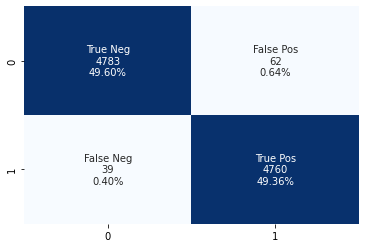

In [70]:
print_confusion_matrix(confusion_matrix(xgb_predict_test, y_test))

In [71]:
print(classification_report(y_test, xgb_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4822
           1       0.99      0.99      0.99      4822

    accuracy                           0.99      9644
   macro avg       0.99      0.99      0.99      9644
weighted avg       0.99      0.99      0.99      9644



In [72]:
# Top 10 Important features
pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]

col_111    0.421203
col_16     0.075552
col_60     0.044264
col_35     0.033254
col_110    0.030258
col_56     0.028812
col_102    0.017374
col_57     0.015896
col_53     0.015723
col_34     0.015568
dtype: float32